# Lê Văn Hiếu
# MSSV: 17103271
# Thực hành môn xử lý ảnh
# LAB 9

In [160]:
pip install scikit-image

     |████████████████████████████████| 12.4 MB 334 kB/s eta 0:00:01
     |████████████████████████████████| 1.6 MB 898 kB/s eta 0:00:01
     |████████████████████████████████| 3.3 MB 591 kB/s eta 0:00:01     |████████▋                       | 890 kB 842 kB/s eta 0:00:03
     |████████████████████████████████| 2.1 MB 367 kB/s eta 0:00:01
     |████████████████████████████████| 4.4 MB 340 kB/s eta 0:00:01
     |████████████████████████████████| 26.0 MB 561 kB/s eta 0:00:01     |█████████████████████████████▎  | 23.8 MB 1.0 MB/s eta 0:00:03
     |████████████████████████████████| 133 kB 411 kB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


### IMPORT LIBRARIES

In [ ]:
import pandas
import cv2
import numpy as np
import matplotlib.pyplot as plt
from collections import deque

## II - HOLE FILLING AS DUAL TO SMALL REGION REMOVAL

### BACKGROUND FILLING FUNCTION 

In [120]:
def dfs(img,visited,x,y,direct):
    stack = []
    stack.append(x)
    stack.append(y)
    while len(stack)!=0:
        y=stack.pop()
        x=stack.pop()
        visited[x][y]=255
        for i in direct:
            xx = x + i[0]
            yy = y + i[1]
            if xx>=0 and xx<img.shape[0] and yy>=0 and yy<img.shape[1] and visited[xx][yy]==0 and img[xx][yy]==0:
                stack.append(xx)
                stack.append(yy)

### Imread Image into program

In [88]:
img = cv2.imread('../images/LAB9/peter.png')
img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

Text(0.5, 1.0, 'Original Image')

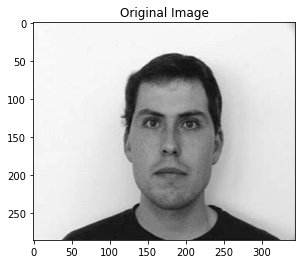

In [129]:
plt.imshow(img,cmap='gray')
plt.title('Original Image')

### Convert to Image Binary with thresh hold = 100

In [128]:
ret,binary_img = cv2.threshold(img,100,255,cv2.THRESH_BINARY_INV)

In [103]:
background_img = np.zeros((img.shape[0],img.shape[1]))

In [104]:
direct = [[0,-1],[0,1],[-1,0],[1,0]]

In [121]:
dfs(binary_img,background_img,0,0,direct)

### Show Result of Hole Filling Object 

(([], <a list of 0 Text major ticklabel objects>),
 ([], <a list of 0 Text major ticklabel objects>))

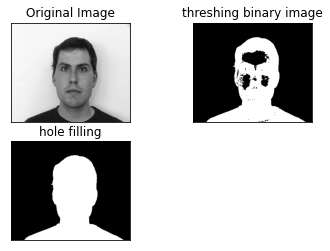

In [130]:
plt.subplot(221),
plt.imshow(img, cmap='gray'),
plt.title('Original Image')
plt.xticks([]), plt.yticks([])
    
plt.subplot(222),
plt.imshow(binary_img, cmap='gray'),
plt.title('threshing binary image')
plt.xticks([]), plt.yticks([])
    
plt.subplot(223),
plt.imshow((255-background_img), cmap='gray'),
plt.title('hole filling')
plt.xticks([]), plt.yticks([])

# plt.subplot(224),
# plt.imshow(Vertical, cmap='gray'),
# plt.title('Vertical')
# plt.xticks([]), plt.yticks([])

## III - REGION LABELING AND COUNTING

In [136]:
img = cv2.imread('../images/LAB9/coin.png')
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

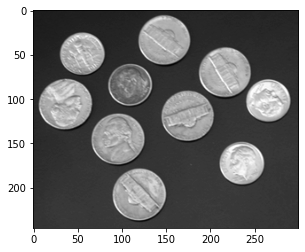

In [137]:
plt.imshow(img,cmap='gray')

In [150]:
ret,binary_img = cv2.threshold(img,120,255,cv2.THRESH_BINARY_INV)

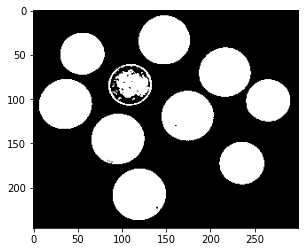

In [151]:
plt.imshow(255-binary_img,cmap='gray')

In [152]:
img_region_label = np.zeros((img.shape[0],img.shape[1]))
dfs(255-binary_img,img_region_label,0,0,direct)

(([], <a list of 0 Text major ticklabel objects>),
 ([], <a list of 0 Text major ticklabel objects>))

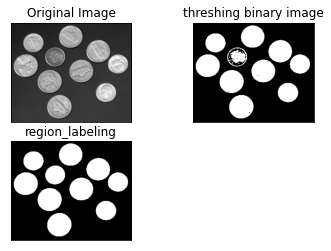

In [154]:
plt.subplot(221),
plt.imshow(img, cmap='gray'),
plt.title('Original Image')
plt.xticks([]), plt.yticks([])
    
plt.subplot(222),
plt.imshow(255-binary_img, cmap='gray'),
plt.title('threshing binary image')
plt.xticks([]), plt.yticks([])
    
plt.subplot(223),
plt.imshow((255-img_region_label), cmap='gray'),
plt.title('region_labeling')
plt.xticks([]), plt.yticks([])


# LAB 10

In [163]:
import skimage

In [156]:
img = cv2.imread('../images/LAB9/bacteria.png')
img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

Text(0.5, 1.0, 'Original Image')

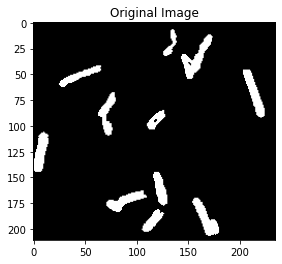

In [158]:
plt.imshow(img,cmap='gray')
plt.title('Original Image')